In [1]:
#%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import pycountry


#data file to work with
file = '../cleanData/CleanFullDataSet.csv'

#read data file
clean_data = pd.read_csv(file, low_memory = False)

In [2]:
# display the columns related to citizenship data 
start_df = pd.DataFrame(clean_data[['gender', 'ageBroad', 'Citizenship Country', 'Citizenship Region', 'Citizenship Intermediate Region', 'Citizenship Sub-Region']])
start_df.head(2)

,gender,ageBroad,Citizenship Country,Citizenship Region,Citizenship Intermediate Region,Citizenship Sub-Region
0,Female,18--20,Colombia,Americas,South America,Latin America and the Caribbean
1,Female,18--20,Colombia,Americas,South America,Latin America and the Caribbean


In [3]:
#check to see if there is any missing info in the columns
start_df.count()

gender                             48773
ageBroad                           48773
Citizenship Country                48773
Citizenship Region                 48773
Citizenship Intermediate Region    11001
Citizenship Sub-Region             48773
dtype: int64

In [4]:
# create a new data frame that doesn't include the 'Citizenship Intermediate Region' bc it has missing info & isn't of importance to me rn
citizen_df = pd.DataFrame(clean_data[['gender', 'ageBroad', 'Citizenship Region', 'Citizenship Sub-Region', 'Citizenship Country',]])
citizen_df.count()

gender                    48773
ageBroad                  48773
Citizenship Region        48773
Citizenship Sub-Region    48773
Citizenship Country       48773
dtype: int64

In [5]:
# rename columns
citizen_df_renamed = citizen_df.rename(columns = {'gender' : 'Gender', 'ageBroad' : 'Age Range',})
citizen_df_renamed.head(2)

,Gender,Age Range,Citizenship Region,Citizenship Sub-Region,Citizenship Country
0,Female,18--20,Americas,Latin America and the Caribbean,Colombia
1,Female,18--20,Americas,Latin America and the Caribbean,Colombia


# Explore the Data

In [6]:
citizen_df_renamed['Citizenship Country'].nunique()

45

In [50]:
citizen_df_renamed['Citizenship Country'].value_counts()

Philippines                         11365
unknown                              9136
Ukraine                              7761
Republic of Moldova                  5901
United States of America             3636
Cambodia                             1979
Indonesia                            1971
Belarus                              1463
Myanmar                              1250
Romania                               655
Ghana                                 544
Kyrgyzstan                            437
Bulgaria                              342
Haiti                                 339
Uzbekistan                            261
Viet Nam                              170
Guinea-Bissau                         145
Lao People's Democratic Republic      126
Colombia                              124
Nigeria                               108
Afghanistan                            97
Madagascar                             94
Sri Lanka                              85
Sierra Leone                      

In [8]:
regions = clean_data['Citizenship Region'].value_counts()
regions

Asia        17992
Europe      16144
unknown      9136
Americas     4136
Africa       1365
Name: Citizenship Region, dtype: int64

In [9]:
sub_regions = clean_data['Citizenship Sub-Region'].value_counts()
sub_regions

South-eastern Asia                 16916
Eastern Europe                     16122
unknown                             9136
Northern America                    3636
Sub-Saharan Africa                  1365
Central Asia                         821
Latin America and the Caribbean      500
Southern Asia                        220
Eastern Asia                          35
Southern Europe                       22
Name: Citizenship Sub-Region, dtype: int64

# Regions

## Asia

In [10]:
#create a data frame for each region, based on gender
is_female = citizen_df_renamed['Gender'] == 'Female'
is_male = citizen_df_renamed['Gender'] == 'Male'
is_asia = citizen_df_renamed['Citizenship Region'] == 'Asia'

female_asia = pd.DataFrame(citizen_df_renamed[is_female & is_asia])
male_asia = pd.DataFrame(citizen_df_renamed[is_male & is_asia])

female_asia.nunique()

Gender                     1
Age Range                 10
Citizenship Region         1
Citizenship Sub-Region     4
Citizenship Country       15
dtype: int64

In [11]:
male_asia.nunique()

Gender                     1
Age Range                 10
Citizenship Region         1
Citizenship Sub-Region     3
Citizenship Country       10
dtype: int64

In [12]:
asia_df = citizen_df_renamed.loc[citizen_df_renamed['Citizenship Region'] == 'Asia', ['Gender', 'Age Range', 'Citizenship Sub-Region', 'Citizenship Country']]
asia_df.head(2)

,Gender,Age Range,Citizenship Sub-Region,Citizenship Country
1977,Female,18--20,Central Asia,Uzbekistan
1978,Female,18--20,Central Asia,Uzbekistan


In [13]:
# copy the df so we don't overwrite original asia_df data
asia_df_copy = asia_df.copy()

In [14]:
# See how many countries in this region are included in the data set
country_counts = asia_df_copy['Citizenship Country'].value_counts()
country_counts

Philippines                         11365
Cambodia                             1979
Indonesia                            1971
Myanmar                              1250
Kyrgyzstan                            437
Uzbekistan                            261
Viet Nam                              170
Lao People's Democratic Republic      126
Afghanistan                            97
Sri Lanka                              85
Thailand                               55
Kazakhstan                             54
Tajikistan                             43
Nepal                                  27
Turkmenistan                           26
China                                  23
Republic of Korea                      12
Bangladesh                             11
Name: Citizenship Country, dtype: int64

In [15]:
asia_sub_counts = asia_df_copy['Citizenship Sub-Region'].value_counts()
asia_sub_counts

South-eastern Asia    16916
Central Asia            821
Southern Asia           220
Eastern Asia             35
Name: Citizenship Sub-Region, dtype: int64

In [16]:
asia_sub_list = asia_df_copy['Citizenship Sub-Region'].unique()
list(asia_sub_list)

['Central Asia', 'South-eastern Asia', 'Southern Asia', 'Eastern Asia']

In [17]:
asia_country_list = asia_df_copy['Citizenship Country'].unique()
asia_country_list

array(['Uzbekistan', 'Indonesia', 'Tajikistan', 'Kyrgyzstan', 'Cambodia',
       "Lao People's Democratic Republic", 'Kazakhstan', 'Turkmenistan',
       'Sri Lanka', 'Myanmar', 'Afghanistan', 'Nepal', 'Philippines',
       'Bangladesh', 'Thailand', 'Republic of Korea', 'Viet Nam', 'China'],
      dtype=object)

In [18]:
asia_gender_counts = asia_df_copy['Gender'].value_counts()
asia_gender_counts

Female    11725
Male       6267
Name: Gender, dtype: int64

In [19]:
# use groupby to separate the data into fields acoording to country
grouped_asia_df = asia_df_copy.groupby(['Citizenship Country', 'Gender', 'Age Range'])

#the object returned is a groupby object and cannot be returned normally
print(grouped_asia_df)

#in order to be visualized, a data function must be used
grouped_asia_df.count().head(60)

Citizenship Sub-Region
Citizenship Country              Gender Age Range                        
Afghanistan                      Male   9--17                          97
Bangladesh                       Male   30--38                         11
Cambodia                         Female 0--8                           30
                                        18--20                         60
                                        21--23                         53
                                        24--26                         29
                                        27--29                         22
                                        30--38                         69
                                        9--17                         141
                                        unknown                       518
                                 Male   0--8                           35
                                        18--20                         45
                                        21--23                         53
                                        24--26                        117
                                        27--29                         80
                                        30--38                        253
                                        39--47                         42
                                        9--17                         166
                                        unknown                       266
China                            Female 30--38                         23
Indonesia                        Female 18--20                        199
                                        21--23                        183
                                        24--26                        144
                                        27--29                        201
                                        30--38                        734
                                        39--47                        230
                                        48+                            12
                                        9--17                         117
                                 Male   21--23                         50
                                        24--26                         17
                                        27--29                         11
                                        30--38                         58
                                        39--47                         15
Kazakhstan                       Female 18--20                         39
                                        21--23                         15
Kyrgyzstan                       Female 21--23                         16
                                        30--38                         36
                                        48+                            18
                                 Male   21--23                         12
                                        24--26                         52
                                        27--29                         18
                                        30--38                        169
                                        39--47                         88
                                        48+                            28
Lao People's Democratic Republic Female 0--8                          126
Myanmar                          Female 9--17                          26
                                 Male   18--20                         43
                                        21--23                        119
                                        24--26                        153
                                        27--29                        158
                                        30--38                        483
                                        39--47                        208
                                        48+            

## Europe

In [20]:
#create a data frame for each region, based on gender
is_female = citizen_df_renamed['Gender'] == 'Female'
is_male = citizen_df_renamed['Gender'] == 'Male'
is_europe = citizen_df_renamed['Citizenship Region'] == 'Europe'
female_europe = pd.DataFrame(citizen_df_renamed[is_female & is_europe])
male_europe = pd.DataFrame(citizen_df_renamed[is_male & is_europe])

#show unique values in the series
female_europe.nunique() 

Gender                    1
Age Range                 9
Citizenship Region        1
Citizenship Sub-Region    2
Citizenship Country       6
dtype: int64

In [21]:
male_europe.nunique()

Gender                    1
Age Range                 9
Citizenship Region        1
Citizenship Sub-Region    1
Citizenship Country       4
dtype: int64

In [22]:
europe_df = citizen_df_renamed.loc[citizen_df_renamed['Citizenship Region'] == 'Europe', ['Gender', 'Age Range', 'Citizenship Sub-Region', 'Citizenship Country']]
europe_df.head()

,Gender,Age Range,Citizenship Sub-Region,Citizenship Country
11,Female,18--20,Eastern Europe,Republic of Moldova
12,Female,18--20,Eastern Europe,Republic of Moldova
13,Female,18--20,Eastern Europe,Republic of Moldova
14,Female,18--20,Eastern Europe,Republic of Moldova
15,Female,18--20,Eastern Europe,Republic of Moldova


In [23]:
# copy the df so we don't overwrite original europe_df data
europe_df_copy = europe_df.copy()

In [24]:
# See how many countries in this region are included in the data set
euro_country_counts = europe_df_copy['Citizenship Country'].value_counts()
euro_country_counts

Ukraine                7761
Republic of Moldova    5901
Belarus                1463
Romania                 655
Bulgaria                342
Albania                  22
Name: Citizenship Country, dtype: int64

In [25]:
europe_sub_counts = europe_df_copy['Citizenship Sub-Region'].value_counts()
europe_sub_counts

Eastern Europe     16122
Southern Europe       22
Name: Citizenship Sub-Region, dtype: int64

In [26]:
europe_country_list = europe_df_copy['Citizenship Country'].unique()
europe_country_list

array(['Republic of Moldova', 'Romania', 'Ukraine', 'Belarus', 'Albania',
       'Bulgaria'], dtype=object)

In [27]:
europe_gender_counts = europe_df_copy['Gender'].value_counts()
europe_gender_counts

Female    10518
Male       5626
Name: Gender, dtype: int64

In [28]:
# use groupby to separate the data into fields acoording to country
europe_df_copy = europe_df.copy()
grouped_europe_df = europe_df_copy.groupby(['Citizenship Country', 'Gender', 'Age Range'])

#the object returned is a groupby object and cannot be returned normally
print(grouped_europe_df)

#in order to be visualized, a data function must be used
grouped_europe_df.count()

Citizenship Sub-Region
Citizenship Country Gender Age Range                        
Albania             Female 18--20                         11
                           21--23                         11
Belarus             Female 18--20                        121
                           21--23                        126
                           24--26                         84
                           27--29                         25
                           30--38                         59
                           39--47                         30
                           9--17                          78
                    Male   18--20                         23
                           21--23                         38
                           24--26                         27
                           27--29                         93
                           30--38                        238
                           39--47                        298
                           48+                           179
                           9--17                          44
Bulgaria            Female 18--20                        112
                           21--23                         66
                           24--26                         45
                           27--29                         28
                           30--38                         49
                           9--17                          42
Republic of Moldova Female 0--8                          415
                           18--20                        822
                           21--23                        702
                           24--26                        504
                           27--29                        349
                           30--38                        638
                           39--47                        269
                           48+                           218
                           9--17                         964
                    Male   0--8                          458
                           18--20                         42
                           30--38                         23
                           9--17                         497
Romania             Female 18--20                        321
                           21--23                        182
                           24--26                         72
                           27--29                         11
                           9--17                          52
                    Male   39--47                         17
Ukraine             Female 0--8                           29
                           18--20                        354
                           21--23                        800
                           24--26                        728
                           27--29                        427
                           30--38                        877
                           39--47                        368
                           48+                           450
                           9--17                          79
                    Male   18--20                         41
                           21--23                        174
                           24--26                        282
                           27--29                        412
                           30--38                       1588
                           39--47                        710
                           48+                           396
                           9--17                          46

## Americas

In [29]:
#create a data frame for each region, based on gender
is_female = citizen_df_renamed['Gender'] == 'Female'
is_male = citizen_df_renamed['Gender'] == 'Male'
is_americas = citizen_df_renamed['Citizenship Region'] == 'Americas'

female_americas = pd.DataFrame(citizen_df_renamed[is_female & is_americas])
male_americas = pd.DataFrame(citizen_df_renamed[is_male & is_americas])

female_americas.nunique()

Gender                     1
Age Range                 10
Citizenship Region         1
Citizenship Sub-Region     2
Citizenship Country        4
dtype: int64

In [30]:
male_americas.nunique()

Gender                    1
Age Range                 4
Citizenship Region        1
Citizenship Sub-Region    2
Citizenship Country       4
dtype: int64

In [31]:
americas_df = citizen_df_renamed.loc[citizen_df_renamed['Citizenship Region'] == 'Americas', ['Gender', 'Age Range', 'Citizenship Sub-Region', 'Citizenship Country']]
americas_df.head()

,Gender,Age Range,Citizenship Sub-Region,Citizenship Country
0,Female,18--20,Latin America and the Caribbean,Colombia
1,Female,18--20,Latin America and the Caribbean,Colombia
2,Female,18--20,Latin America and the Caribbean,Colombia
3,Female,18--20,Latin America and the Caribbean,Colombia
4,Female,18--20,Latin America and the Caribbean,Colombia


In [32]:
# copy the df so we don't overwrite original europe_df data
americas_df_copy = americas_df.copy()

In [33]:
# See how many countries in this region are included in the data set
americas_country_counts = americas_df_copy['Citizenship Country'].value_counts()
americas_country_counts

United States of America            3636
Haiti                                339
Colombia                             124
Mexico                                19
Bolivia (Plurinational State of)      18
Name: Citizenship Country, dtype: int64

In [34]:
americas_country_list = americas_df_copy['Citizenship Country'].unique()
americas_country_list

array(['Colombia', 'Haiti', 'Bolivia (Plurinational State of)',
       'United States of America', 'Mexico'], dtype=object)

In [35]:
americas_sub_counts = americas_df_copy['Citizenship Sub-Region'].value_counts()
americas_sub_counts

Northern America                   3636
Latin America and the Caribbean     500
Name: Citizenship Sub-Region, dtype: int64

In [36]:
americas_gender_counts = americas_df_copy['Gender'].value_counts()
americas_gender_counts

Female    3942
Male       194
Name: Gender, dtype: int64

In [37]:
# use groupby to separate the data into fields acoording to country
grp_americas_df = americas_df_copy.groupby(['Citizenship Country', 'Gender', 'Age Range'])

#the object returned is a groupby object and cannot be returned normally
print(grp_americas_df)

#in order to be visualized, a data function must be used
grp_americas_df.count()

Citizenship Sub-Region
Citizenship Country              Gender Age Range                        
Bolivia (Plurinational State of) Female 9--17                          18
Colombia                         Female 18--20                         11
                                        24--26                         32
                                        30--38                         13
                                        unknown                        53
                                 Male   unknown                        15
Haiti                            Female 0--8                           15
                                        9--17                         190
                                 Male   0--8                           24
                                        9--17                         110
Mexico                           Male   21--23                         19
United States of America         Female 18--20                        659
                                        21--23                        512
                                        24--26                        399
                                        27--29                        255
                                        30--38                        536
                                        39--47                        143
                                        48+                            26
                                        9--17                        1080
                                 Male   9--17                          26

## Africa

In [38]:
#create a data frame for each region, based on gender
is_female = citizen_df_renamed['Gender'] == 'Female'
is_male = citizen_df_renamed['Gender'] == 'Male'
is_africa = citizen_df_renamed['Citizenship Region'] == 'Africa'

female_africa = pd.DataFrame(citizen_df_renamed[is_female & is_africa])
male_africa = pd.DataFrame(citizen_df_renamed[is_male & is_africa])

female_africa.nunique()

Gender                    1
Age Range                 6
Citizenship Region        1
Citizenship Sub-Region    1
Citizenship Country       8
dtype: int64

In [39]:
male_africa.nunique()

Gender                     1
Age Range                  3
Citizenship Region         1
Citizenship Sub-Region     1
Citizenship Country       12
dtype: int64

In [40]:
africa_df = citizen_df_renamed.loc[citizen_df_renamed['Citizenship Region'] == 'Africa', ['Gender', 'Age Range', 'Citizenship Sub-Region', 'Citizenship Country']]
africa_df.head()

,Gender,Age Range,Citizenship Sub-Region,Citizenship Country
1606,Female,0--8,Sub-Saharan Africa,Ghana
1607,Female,0--8,Sub-Saharan Africa,Ghana
1608,Female,0--8,Sub-Saharan Africa,Ghana
1609,Female,0--8,Sub-Saharan Africa,Ghana
1610,Female,0--8,Sub-Saharan Africa,Ghana


In [41]:
# copy the df so we don't overwrite original europe_df data
africa_df_copy = africa_df.copy()

In [42]:
# See how many countries in this region are included in the data set
africa_country_counts = africa_df_copy['Citizenship Country'].value_counts()
africa_country_counts

Ghana                               544
Guinea-Bissau                       145
Nigeria                             108
Madagascar                           94
Sierra Leone                         81
Senegal                              70
Uganda                               70
Democratic Republic of the Congo     53
Mali                                 45
Burkina Faso                         33
Kenya                                32
Côte d’Ivoire                        31
Niger                                31
Guinea                               15
Eritrea                              13
Name: Citizenship Country, dtype: int64

In [43]:
africa_country_list = africa_df_copy['Citizenship Country'].unique()
africa_country_list

array(['Ghana', 'Democratic Republic of the Congo', 'Mali',
       'Guinea-Bissau', 'Côte d’Ivoire', 'Senegal', 'Sierra Leone',
       'Guinea', 'Burkina Faso', 'Niger', 'Uganda', 'Eritrea', 'Nigeria',
       'Kenya', 'Madagascar'], dtype=object)

In [44]:
africa_sub_counts = africa_df_copy['Citizenship Sub-Region'].value_counts()
africa_sub_counts

Sub-Saharan Africa    1365
Name: Citizenship Sub-Region, dtype: int64

In [45]:
africa_gender_counts = africa_df_copy['Gender'].value_counts()
africa_gender_counts

Male      780
Female    585
Name: Gender, dtype: int64

In [49]:
# use groupby to separate the data into fields acoording to country
grp_africa_df = africa_df_copy.groupby(['Citizenship Country', 'Gender', 'Age Range'])

#the object returned is a groupby object and cannot be returned normally
print(grp_africa_df)

#in order to be visualized, a data function must be used
grp_africa_df.count()

Citizenship Sub-Region
Citizenship Country              Gender Age Range                        
Burkina Faso                     Male   18--20                         14
                                        9--17                          19
Côte d’Ivoire                    Male   9--17                          31
Democratic Republic of the Congo Female 0--8                           25
                                 Male   0--8                           28
Eritrea                          Male   9--17                          13
Ghana                            Female 0--8                           53
                                        9--17                         154
                                 Male   0--8                           72
                                        9--17                         265
Guinea                           Male   9--17                          15
Guinea-Bissau                    Male   0--8                           14
                                        9--17                         131
Kenya                            Female 30--38                         32
Madagascar                       Female 21--23                         18
                                        24--26                         20
                                        27--29                         21
                                        30--38                         35
Mali                             Female 9--17                          19
                                 Male   9--17                          26
Niger                            Male   9--17                          31
Nigeria                          Female 21--23                         31
                                        24--26                         32
                                        27--29                         31
                                        30--38                         14
Senegal                          Male   9--17                          70
Sierra Leone                     Female 30--38                         16
                                        9--17                          40
                                 Male   9--17                          25
Uganda                           Female 0--8                           21
                                        9--17                          23
                                 Male   0--8                           26

In [47]:
sub_labels=['Central Asia', 'South-eastern Asia', 'Southern Asia', 'Eastern Asia']
sub_sizes=[16916, 16122, 9136, 3636, 1365, 821, 500, 220, 35, 22]
labels = ['ASIA', 'EUROPE', 'AMERICAS', 'AFRICA']
sizes = [45.40, 40.73, 10.43, 3.44]

ValueError: 'label' must be of length 'x'

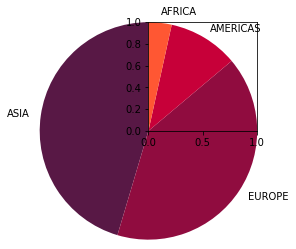

In [48]:
plt.figure(figsize=(2, 2))

labels = labels
sizes = sizes
sub_labels = sub_labels
sub_sizes = sub_sizes
colors_big = ['#581845', '#900C3F','#C70039', '#FF5733']
colors_small = ['#4A235A', '##AD11CB', '##CB118C', '##CB112F', '##FF5733','##73C6B67', '##85C1E9']
 
bigger = plt.pie(sizes, labels=labels, colors=colors_big, startangle=90, frame=True)
smaller = plt.pie(sub_sizes, labels=sub_labels, colors= colors_small,
        radius=0.7, startangle=90, labeldistance=0.7)
centre_circle = plt.Circle((0, 0), 0.4, color='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# for i, (asia, europe, americas, africa) in enumerate(bigger):
#     if i > 0:
#         asia.set_fontsize(12)
#         europe.set_fontsize(12)
#         ama.set_fontsize(12)
#         europe.set_fontsize(12)

# for j, (potato, tomato, onion, apple, banana, cherry, durian) in enumerate(smaller):
#     if j > 0:
#         potato.set_fontsize(12)
#         tomato.set_fontsize(12)
#         onion.set_fontsize(12)
#         apple.set_fontsize(12)
#         banana.set_fontsize(12)
#         cherry.set_fontsize(12)
#         durian.set_fontsize(12)
        
plt.axis('equal')
plt.tight_layout()

plt.show()